# Imports

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline

# Data Processing

In [275]:
df=pd.read_csv('/content/CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Data Cleaning

In [276]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [277]:
df['fueltype']=np.where(df['fueltype']=='gas',1,0)
df['fueltype']

,fueltype
0,1
1,1
2,1
3,1
4,1
...,...
200,1
201,1
202,1
203,0


In [278]:
df['aspiration']=np.where(df['aspiration']=='std',1,0)
df['aspiration'].unique()

array([1, 0])

In [279]:
df['doornumber']=np.where(df['doornumber']=='two',2,4)
# df['doornumber'].unique()
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,1,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,1,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,1,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,1,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,1,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),1,1,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,1,0,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,1,1,4,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,0,0,4,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [280]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [281]:
df['enginelocation']=np.where(df['enginelocation']=='front',1,0)
df['enginelocation'].unique()

array([1, 0])

In [282]:
df['drivewheel']=df['drivewheel'].replace('4wd','fwd')

In [283]:
df['drivewheel'].unique()

array(['rwd', 'fwd'], dtype=object)

In [284]:
df['drivewheel']=np.where(df['drivewheel']=='fwd',1,0)
df['drivewheel'].unique()

array([0, 1])

In [285]:
df['CarName']=df['CarName'].str.split(' ').str[0]

In [286]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [287]:
df['CarName']=df['CarName'].replace({
    'maxda':'mazda',
    'Nissan':'nissan',
    'porcshce':'porsche',
    'toyouta':'toyota',
    'vokswagen':'volkswagen',
    'vw':'volkswagen'
})

In [288]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [289]:
df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [290]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [291]:
df['cylindernumber']=df['cylindernumber'].replace({
    'four':4,
    'six':6,
    'five':5,
    'three':3,
    'twelve':12,
    'two':2,
    'eight':8
})

<ipython-input-291-5fe3f8693669>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cylindernumber']=df['cylindernumber'].replace({


In [292]:
df['cylindernumber'].unique()

array([ 4,  6,  5,  3, 12,  2,  8])

In [293]:
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [294]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

{'whiskers': [<matplotlib.lines.Line2D at 0x79f2f1c6e4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x79f2f1c6db70>,
 'boxes': [<matplotlib.lines.Line2D at 0x79f2f1c6ee30>],
 'medians': [<matplotlib.lines.Line2D at 0x79f2f1c6cd60>],
 'fliers': [<matplotlib.lines.Line2D at 0x79f2f1c6c1f0>],
 'means': []}

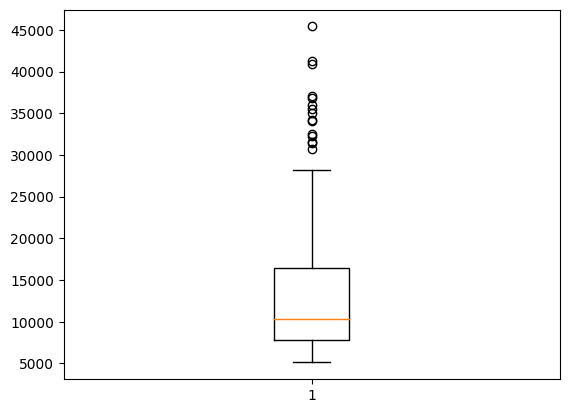

In [296]:
plt.boxplot(df['price'])

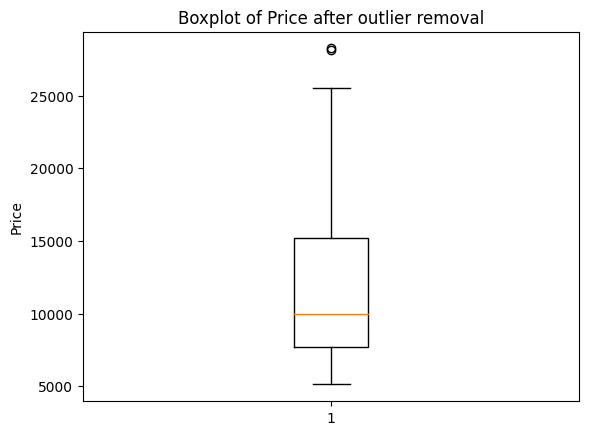

In [297]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
plt.boxplot(df['price'])
plt.title('Boxplot of Price after outlier removal')
plt.ylabel('Price')
plt.show()

In [298]:
col=[]
for i in df.columns:
  if df[i].dtype=='object':
    col.append(i)
col

['CarName', 'carbody', 'enginetype', 'fuelsystem']

In [299]:
encode=OneHotEncoder()
new_df=encode.fit_transform(df.loc[:,col]).toarray()
new_df=pd.DataFrame(new_df,columns=encode.get_feature_names_out(),index=df.index)
new_df

,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_mazda,CarName_mercury,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [300]:
df=pd.concat([df,new_df],axis=1)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero,1,1,2,convertible,0,1,88.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,3,alfa-romero,1,1,2,convertible,0,1,88.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,alfa-romero,1,1,2,hatchback,0,1,94.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,2,audi,1,1,4,sedan,1,1,99.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,2,audi,1,1,4,sedan,1,1,99.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,1,1,4,sedan,0,1,109.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,202,-1,volvo,1,0,4,sedan,0,1,109.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,203,-1,volvo,1,1,4,sedan,0,1,109.1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,204,-1,volvo,0,0,4,sedan,0,1,109.1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [301]:
df.drop(col,axis=1,inplace=True)
df

,car_ID,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,1,1,2,0,1,88.6,168.8,64.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,3,1,1,2,0,1,88.6,168.8,64.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,1,1,2,0,1,94.5,171.2,65.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,2,1,1,4,1,1,99.8,176.6,66.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,2,1,1,4,1,1,99.4,176.6,66.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,1,1,4,0,1,109.1,188.8,68.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,202,-1,1,0,4,0,1,109.1,188.8,68.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,203,-1,1,1,4,0,1,109.1,188.8,68.9,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,204,-1,0,0,4,0,1,109.1,188.8,68.9,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, 0 to 204
Data columns (total 62 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_ID               190 non-null    int64  
 1   symboling            190 non-null    int64  
 2   fueltype             190 non-null    int64  
 3   aspiration           190 non-null    int64  
 4   doornumber           190 non-null    int64  
 5   drivewheel           190 non-null    int64  
 6   enginelocation       190 non-null    int64  
 7   wheelbase            190 non-null    float64
 8   carlength            190 non-null    float64
 9   carwidth             190 non-null    float64
 10  carheight            190 non-null    float64
 11  curbweight           190 non-null    int64  
 12  cylindernumber       190 non-null    int64  
 13  enginesize           190 non-null    int64  
 14  boreratio            190 non-null    float64
 15  stroke               190 non-null    float64


<Axes: >

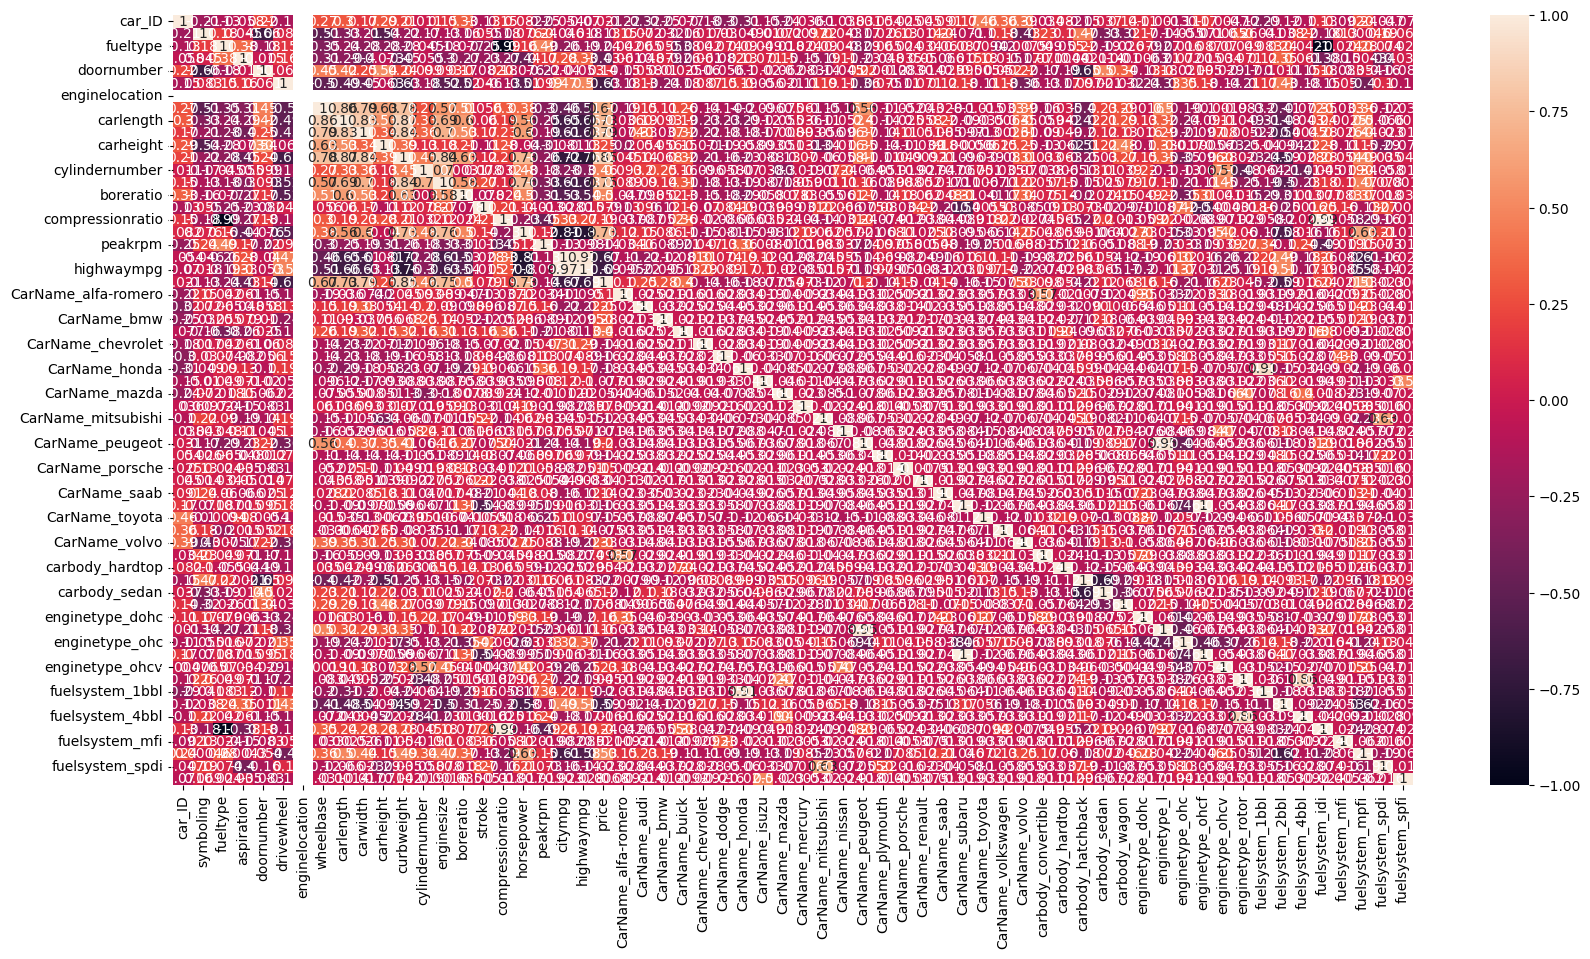

In [303]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

# Splitting the Dataset

In [304]:
x=df.drop('price',axis=1)
y=df['price']

In [305]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [306]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [307]:
x_train

array([[-0.8003492 ,  1.76411822,  0.34299717, ..., -0.88782616,
        -0.23570226, -0.08137885],
       [-1.11486934, -0.60885496,  0.34299717, ..., -0.88782616,
        -0.23570226, -0.08137885],
       [ 0.45773135,  0.97312716,  0.34299717, ...,  1.12634662,
        -0.23570226, -0.08137885],
       ...,
       [-0.03887939, -0.60885496,  0.34299717, ...,  1.12634662,
        -0.23570226, -0.08137885],
       [ 1.46750653, -2.19083708,  0.34299717, ...,  1.12634662,
        -0.23570226, -0.08137885],
       [ 0.12665752, -0.60885496,  0.34299717, ...,  1.12634662,
        -0.23570226, -0.08137885]])

In [308]:
y_train=np.array(y_train)
y_train

array([13645. ,  9095. , 12170. , 18344. , 10898. ,  9279. ,  9959. ,
        5399. ,  9960. ,  8449. , 15690. ,  7129. ,  9639. , 20970. ,
        8916.5, 12290. , 10595. , 12440. , 17199. , 12964. , 12945. ,
       11850. , 11549. ,  8013. , 16845. ,  7898. , 16500. ,  6795. ,
       11900. ,  8778. , 18620. ,  8845. ,  6918. ,  6692. ,  9295. ,
        7349. , 15985. , 16925. , 12764. ,  9298. , 17710. ,  6479. ,
       15580. , 17450. ,  7295. ,  7957. ,  6338. , 13499. ,  5348. ,
       16430. ,  7603. ,  7126. ,  6488. , 13495. ,  8195. ,  7788. ,
        8499. , 16515. , 16503. ,  5195. , 22018. ,  6855. ,  6785. ,
        8358. ,  9258. ,  8921. ,  7609. ,  7198. ,  6849. ,  7099. ,
        7799. , 10345. , 15040. ,  7999. ,  9279. , 18950. , 10698. ,
        6695. , 19699. ,  7738. , 13845. , 25552. , 14489. ,  7295. ,
       11048. ,  7898. ,  9995. , 28248. , 21485. ,  9989. , 13950. ,
       17950. ,  8845. ,  8495. ,  8058. , 13295. , 10945. ,  6649. ,
        7895. , 1892

# Model Training

In [309]:
def func(x,w,b):
  return np.dot(x,w)+b

In [310]:
m=len(x_train)
def lasso(x_train, y_train, w, b, alpha):
    w_grad = np.zeros((x_train.shape[1]))
    b_grad = 0

    for i in range(m):
        y_pred = func(x_train[i], w, b)
        err = (y_pred - y_train[i])/m
        w_grad += err * x_train[i]
        b_grad += err
    w_grad += alpha * np.sign(w)

    return w_grad, b_grad


In [311]:
def gradient(x_train,y_train,w,b,alpha,iters,lr):
  for i in range(iters):
    w_,b_=lasso(x_train,y_train,w,b,alpha)
    w=w-lr*w_
    b=b-lr*b_
  return w,b

In [312]:
alpha=0.001
lr=0.005
iters=2000
w=np.zeros((x_train.shape[1]))
b=0
w, b = gradient(x_train, y_train, w, b, alpha, iters, lr)
print("Weights:", w)
print("Bias:", b)

Weights: [-244.99318395  126.36078968  -96.41178356 -822.8586231   224.54728381
 -652.73217953    0.          623.72513357 -221.56157005  857.98495792
 -228.30360954 1101.32981369  503.79217893  335.80393519 -217.58111077
 -368.71527775   61.69219483  608.026098   -108.52763186 -279.24804803
  134.94348411  -80.65700875  425.98600333  857.99769033  757.93698687
 -101.04077356 -336.46891957  180.55770165  -81.59945611   32.38209294
 -164.26542827 -333.90588854  -99.52396121 -261.56022165 -284.00311191
  541.10927813  -83.58863529  243.650914   -167.38769445 -445.85580947
 -131.10168763  356.36842887  549.74899935 -118.71890372  -72.25438097
   -6.94369559  -89.2755907    52.97478445 -261.56022165   80.53160467
 -167.38769445 -174.19870561  540.75448251 -219.72925432  -24.55154132
 -153.53398364   96.41178356   -7.9784939   168.9578892   -93.85945664
  -58.8431474 ]
Bias: 11967.993116393993


# Model Testing

In [313]:
y_pred=func(x_train,w,b)

In [314]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_pred)
print(f"R-squared score: {r2}")

R-squared score: 0.94273693392618


In [315]:
y_predict=func(x_test,w,b)
r2_score(y_test,y_predict)

0.8738313974077292

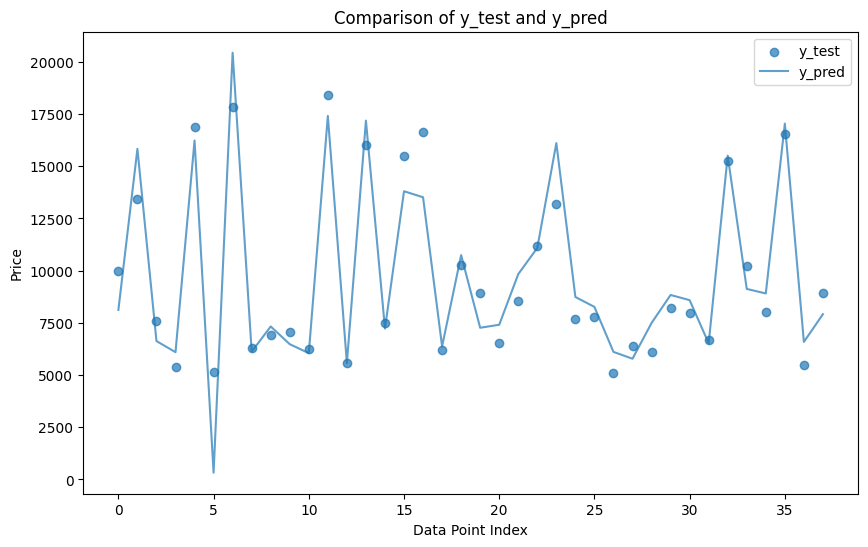

In [316]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(x_test)), y_test, label='y_test', alpha=0.7)
plt.plot(range(len(x_test)), y_predict, label='y_pred', alpha=0.7)
plt.xlabel("Data Point Index")
plt.ylabel("Price")
plt.title("Comparison of y_test and y_pred")
plt.legend()
plt.show()

# Feature Selection Method

In [317]:
feature_importance = pd.DataFrame({
    'Feature_Index': range(len(w)),
    'Weight': w
})
feature_importance['Abs_Weight'] = np.abs(feature_importance['Weight'])
threshold = 0.05
selected_features = feature_importance[feature_importance['Abs_Weight'] > threshold]
print("Selected Features:")
print(selected_features)
selected_feature_indices = selected_features['Feature_Index'].values
x_train_selected = x_train[:, selected_feature_indices]

Selected Features:
    Feature_Index       Weight   Abs_Weight
0               0  -244.993184   244.993184
1               1   126.360790   126.360790
2               2   -96.411784    96.411784
3               3  -822.858623   822.858623
4               4   224.547284   224.547284
5               5  -652.732180   652.732180
7               7   623.725134   623.725134
8               8  -221.561570   221.561570
9               9   857.984958   857.984958
10             10  -228.303610   228.303610
11             11  1101.329814  1101.329814
12             12   503.792179   503.792179
13             13   335.803935   335.803935
14             14  -217.581111   217.581111
15             15  -368.715278   368.715278
16             16    61.692195    61.692195
17             17   608.026098   608.026098
18             18  -108.527632   108.527632
19             19  -279.248048   279.248048
20             20   134.943484   134.943484
21             21   -80.657009    80.657009
22           

In [318]:
x_train_selected = sc.fit_transform(x_train_selected)
x_test_selected = x_test[:, selected_feature_indices]
x_test_selected = sc.transform(x_test_selected)


In [319]:
w=np.zeros((x_train_selected.shape[1]))
b=0
w, b = gradient(x_train_selected, y_train, w, b, alpha, iters, lr)
print("Weights:", w)
print("Bias:", b)

Weights: [-244.99318395  126.36078968  -96.41178356 -822.8586231   224.54728381
 -652.73217953  623.72513357 -221.56157005  857.98495792 -228.30360954
 1101.32981369  503.79217893  335.80393519 -217.58111077 -368.71527775
   61.69219483  608.026098   -108.52763186 -279.24804803  134.94348411
  -80.65700875  425.98600333  857.99769033  757.93698687 -101.04077356
 -336.46891957  180.55770165  -81.59945611   32.38209294 -164.26542827
 -333.90588854  -99.52396121 -261.56022165 -284.00311191  541.10927813
  -83.58863529  243.650914   -167.38769445 -445.85580947 -131.10168763
  356.36842887  549.74899935 -118.71890372  -72.25438097   -6.94369559
  -89.2755907    52.97478445 -261.56022165   80.53160467 -167.38769445
 -174.19870561  540.75448251 -219.72925432  -24.55154132 -153.53398364
   96.41178356   -7.9784939   168.9578892   -93.85945664  -58.8431474 ]
Bias: 11967.993116393993


In [320]:
y_pred_selected=func(x_train_selected,w,b)
y_predict_selected=func(x_test_selected,w,b)
r2 = r2_score(y_train, y_pred_selected)
print(f"R-squared score for y_train and y_pred_selected: {r2}")
r2 = r2_score(y_test, y_predict_selected)
print(f"R-squared score for y_test and y_predict_selected: {r2}")

R-squared score for y_train and y_pred_selected: 0.94273693392618
R-squared score for y_test and y_predict_selected: 0.8738313974077291


# Direct Method

In [321]:
from sklearn.linear_model import LinearRegression

In [322]:
model = LinearRegression()

In [323]:
model.fit(x_train, y_train)

LinearRegression()

In [324]:

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"R-squared (Training): {r2_train}")
print(f"R-squared (Testing): {r2_test}")

R-squared (Training): 0.9585620957526727
R-squared (Testing): 0.8815156531620588
